In [1]:
import os, re
curPath = os.getcwd()
match = re.search(pattern=r"^.+?WQD7003_DataAnalytics", string=curPath, flags=re.IGNORECASE)
rootPath = match.group()
os.chdir(rootPath)
os.getcwd()

'd:\\Administration\\Universities\\UniMalaya\\MCS-AC\\WQD7003_DataAnalytics'

In [2]:
import pandas as pd

from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go


In [3]:
pd.set_option("display.max_rows",10)
pd.set_option("display.max_columns", None)

In [4]:
DataDir = "./data/"
PlotsDir = "./plots/"
ModelsDir = "./models/"

DataFilePath_1 = "./data/Heart_2022_Encoded_1.csv"

In [5]:
df = pd.read_csv(DataFilePath_1)
df

,oe_1__Sex,oe_2__GeneralHealth,oe_3_1__PhysicalActivities,oe_3_2__HadHeartAttack,oe_3_3__HadAngina,oe_3_4__HadStroke,oe_3_5__HadAsthma,oe_3_6__HadSkinCancer,oe_3_7__HadCOPD,oe_3_8__HadDepressiveDisorder,oe_3_9__HadKidneyDisease,oe_3_10__HadArthritis,oe_3_11__AlcoholDrinkers,oe_4__HadDiabetes,oe_5__AgeCategory,oe_6__SmokerStatus,oe_7__ECigaretteUsage,"oe_8__RaceEthnicityCategory_Black only, Non-Hispanic",oe_8__RaceEthnicityCategory_Hispanic,"oe_8__RaceEthnicityCategory_Multiracial, Non-Hispanic","oe_8__RaceEthnicityCategory_Other race only, Non-Hispanic","oe_8__RaceEthnicityCategory_White only, Non-Hispanic",remainder__PhysicalHealthDays,remainder__MentalHealthDays,remainder__SleepHours,remainder__BMI
0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.0,26.57
1,0.0,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,5.0,25.61
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,9.0,21.77
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0,26.08
4,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,22.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329658,1.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,9.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15.0,7.0,29.86
329659,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,31.19
329660,0.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,7.0,28.66
329661,1.0,3.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,32.55


In [6]:
X = df.drop(columns=['oe_3_2__HadHeartAttack'])
y = df['oe_3_2__HadHeartAttack']

In [7]:
# feature selection
def select_features(X_train, y_train, X_test, k='all'):
    # configure to select a subset of features
    fs = SelectKBest(score_func=mutual_info_classif, k=k)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=20240101)

In [24]:
X_train_fs, X_test_fs, fs = select_features(X_train,y_train,X_test)

In [10]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.034478
Feature 1: 0.027802
Feature 2: 0.047441
Feature 3: 0.047505
Feature 4: 0.009670
Feature 5: 0.003529
Feature 6: 0.002072
Feature 7: 0.007166
Feature 8: 0.005282
Feature 9: 0.004627
Feature 10: 0.020509
Feature 11: 0.041989
Feature 12: 0.010207
Feature 13: 0.022428
Feature 14: 0.010191
Feature 15: 0.002178
Feature 16: 0.001326
Feature 17: 0.001120
Feature 18: 0.000525
Feature 19: 0.000449
Feature 20: 0.044366
Feature 21: 0.008176
Feature 22: 0.000908
Feature 23: 0.015361
Feature 24: 0.001667


In [11]:
count = 0
feature_name = X.columns.to_numpy()
selected_features = []
for i in range(len(fs.scores_)):
    if fs.scores_[i] >= 0.01:
        count += 1
        print('%d. Feature %d - %r: %f' % (count, i, feature_name[i], fs.scores_[i]))
        selected_features.append(feature_name[i])
selected_features

1. Feature 0 - 'oe_1__Sex': 0.034478
2. Feature 1 - 'oe_2__GeneralHealth': 0.027802
3. Feature 2 - 'oe_3_1__PhysicalActivities': 0.047441
4. Feature 3 - 'oe_3_3__HadAngina': 0.047505
5. Feature 10 - 'oe_3_10__HadArthritis': 0.020509
6. Feature 11 - 'oe_3_11__AlcoholDrinkers': 0.041989
7. Feature 12 - 'oe_4__HadDiabetes': 0.010207
8. Feature 13 - 'oe_5__AgeCategory': 0.022428
9. Feature 14 - 'oe_6__SmokerStatus': 0.010191
10. Feature 20 - 'oe_8__RaceEthnicityCategory_White only, Non-Hispanic': 0.044366
11. Feature 23 - 'remainder__SleepHours': 0.015361


['oe_1__Sex',
 'oe_2__GeneralHealth',
 'oe_3_1__PhysicalActivities',
 'oe_3_3__HadAngina',
 'oe_3_10__HadArthritis',
 'oe_3_11__AlcoholDrinkers',
 'oe_4__HadDiabetes',
 'oe_5__AgeCategory',
 'oe_6__SmokerStatus',
 'oe_8__RaceEthnicityCategory_White only, Non-Hispanic',
 'remainder__SleepHours']

In [25]:
total_features_name = fs.get_feature_names_out()
total_features_score = fs.scores_

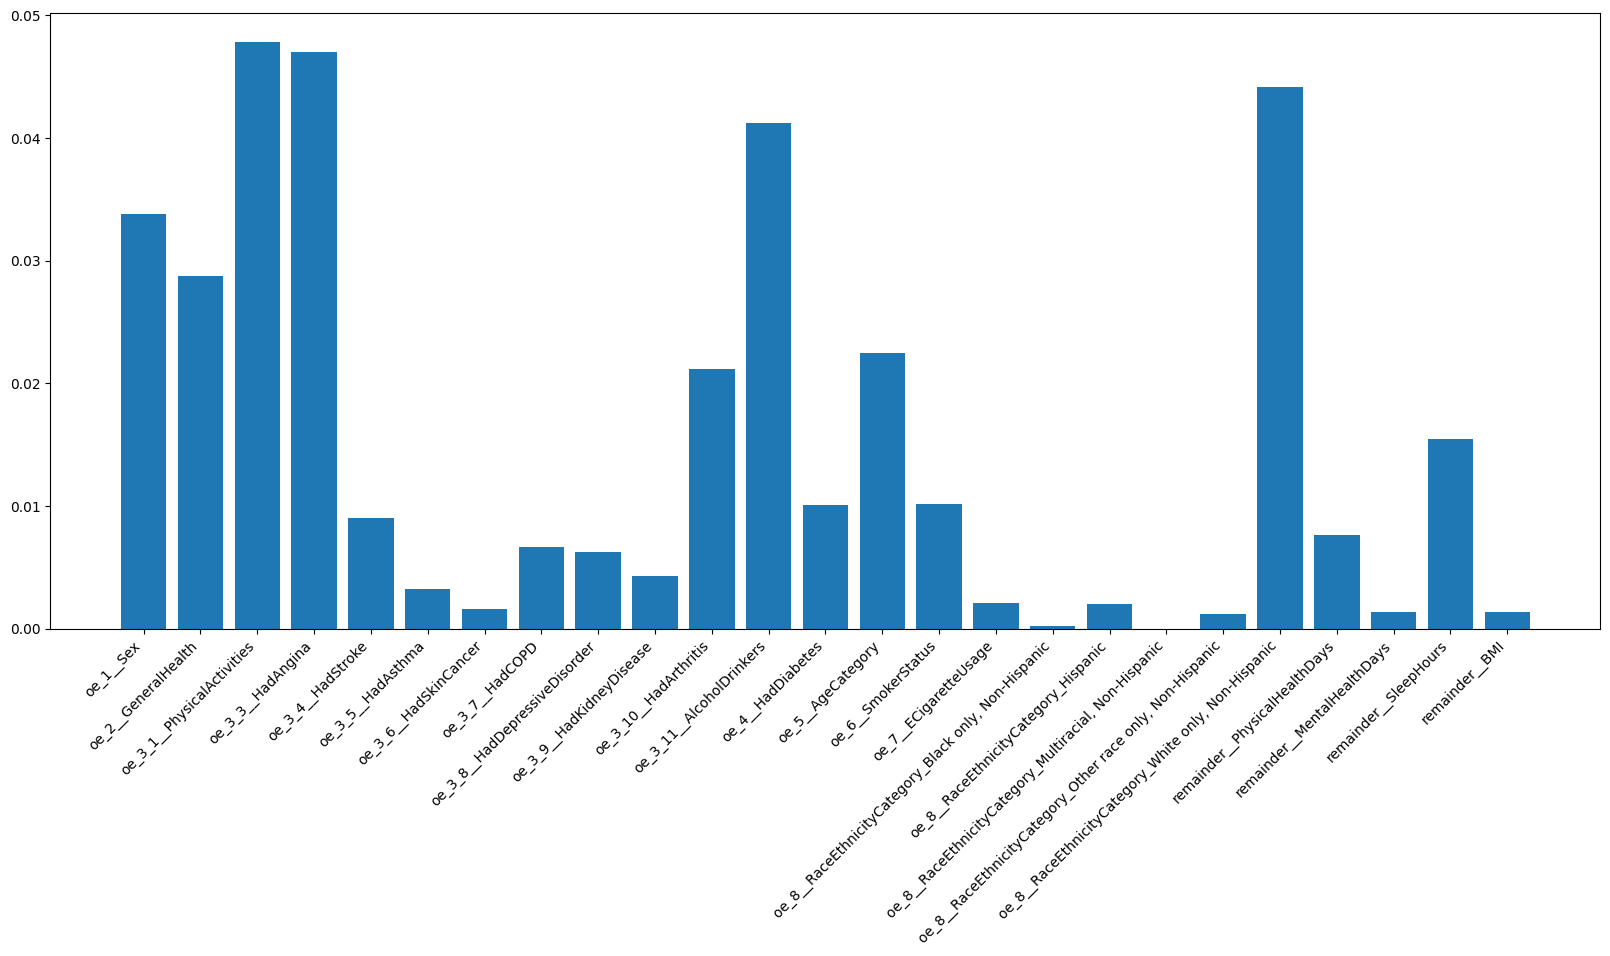

In [29]:
plt.figure(figsize=(20,8))
plt.bar([i for i in total_features_name], total_features_score)
plt.xticks(rotation=45, ha='right')
plt.show()

In [16]:
# Select top 11 features
X_train_fs, X_test_fs, fs = select_features(X_train,y_train,X_test, k=11)

In [17]:
count = 0
feature_name = X.columns.to_numpy()
selected_features = []
selected_features_dict = {}
for i in range(len(fs.scores_)):
    if fs.scores_[i] >= 0.01:
        count += 1
        print('%d. Feature %d - %r: %f' % (count, i, feature_name[i], fs.scores_[i]))
        selected_features.append(feature_name[i])
        selected_features_dict[feature_name[i]] = fs.scores_[i]
selected_features
selected_features_dict

1. Feature 0 - 'oe_1__Sex': 0.033660
2. Feature 1 - 'oe_2__GeneralHealth': 0.028236
3. Feature 2 - 'oe_3_1__PhysicalActivities': 0.048421
4. Feature 3 - 'oe_3_3__HadAngina': 0.046952
5. Feature 10 - 'oe_3_10__HadArthritis': 0.020734
6. Feature 11 - 'oe_3_11__AlcoholDrinkers': 0.041043
7. Feature 12 - 'oe_4__HadDiabetes': 0.011060
8. Feature 13 - 'oe_5__AgeCategory': 0.023100
9. Feature 14 - 'oe_6__SmokerStatus': 0.011428
10. Feature 20 - 'oe_8__RaceEthnicityCategory_White only, Non-Hispanic': 0.045226
11. Feature 23 - 'remainder__SleepHours': 0.015411


{'oe_1__Sex': 0.033660433850730254,
 'oe_2__GeneralHealth': 0.02823590495838313,
 'oe_3_1__PhysicalActivities': 0.04842064856569106,
 'oe_3_3__HadAngina': 0.04695231733836924,
 'oe_3_10__HadArthritis': 0.02073361360834025,
 'oe_3_11__AlcoholDrinkers': 0.0410425003621917,
 'oe_4__HadDiabetes': 0.01105981621096519,
 'oe_5__AgeCategory': 0.023099654880485376,
 'oe_6__SmokerStatus': 0.011427690326367035,
 'oe_8__RaceEthnicityCategory_White only, Non-Hispanic': 0.0452264427972322,
 'remainder__SleepHours': 0.015410581574130555}

In [18]:
df_X_train_fs = pd.DataFrame(X_train_fs,columns=selected_features)
df_X_test_fs = pd.DataFrame(X_test_fs,columns=selected_features)
df_X_train_fs

,oe_1__Sex,oe_2__GeneralHealth,oe_3_1__PhysicalActivities,oe_3_3__HadAngina,oe_3_10__HadArthritis,oe_3_11__AlcoholDrinkers,oe_4__HadDiabetes,oe_5__AgeCategory,oe_6__SmokerStatus,"oe_8__RaceEthnicityCategory_White only, Non-Hispanic",remainder__SleepHours
0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,6.0
1,0.0,3.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,7.0
2,0.0,2.0,0.0,0.0,1.0,0.0,0.0,11.0,1.0,0.0,8.0
3,1.0,4.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,7.0
4,1.0,0.0,0.0,0.0,1.0,0.0,3.0,8.0,0.0,1.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
230759,0.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0
230760,0.0,2.0,1.0,0.0,1.0,1.0,0.0,12.0,1.0,1.0,8.0
230761,0.0,3.0,0.0,0.0,0.0,0.0,3.0,9.0,0.0,0.0,8.0
230762,0.0,3.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,8.0


In [19]:
df_train_fs = pd.concat([df_X_train_fs, y_train.to_frame().reset_index(drop=True)], axis=1)
df_test_fs = pd.concat([df_X_test_fs, y_test.to_frame().reset_index(drop=True)], axis=1)

In [20]:
df_fs = pd.concat([df_train_fs, df_test_fs]).reset_index(drop=True)
df_fs

,oe_1__Sex,oe_2__GeneralHealth,oe_3_1__PhysicalActivities,oe_3_3__HadAngina,oe_3_10__HadArthritis,oe_3_11__AlcoholDrinkers,oe_4__HadDiabetes,oe_5__AgeCategory,oe_6__SmokerStatus,"oe_8__RaceEthnicityCategory_White only, Non-Hispanic",remainder__SleepHours,oe_3_2__HadHeartAttack
0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,6.0,0.0
1,0.0,3.0,1.0,0.0,0.0,1.0,0.0,3.0,1.0,1.0,7.0,0.0
2,0.0,2.0,0.0,0.0,1.0,0.0,0.0,11.0,1.0,0.0,8.0,0.0
3,1.0,4.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,7.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,3.0,8.0,0.0,1.0,16.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
329658,0.0,2.0,0.0,0.0,1.0,1.0,0.0,12.0,1.0,1.0,12.0,1.0
329659,1.0,2.0,1.0,0.0,1.0,0.0,0.0,3.0,1.0,1.0,8.0,0.0
329660,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,3.0,1.0,3.0,0.0
329661,1.0,3.0,1.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,8.0,0.0


In [21]:
df_fs.to_csv(f"{DataDir}FeatureSelection_1_DataOut_1.csv", index=False)

In [22]:
sorted(selected_features_dict.items(),key=lambda x:x[1], reverse=True)

[('oe_3_1__PhysicalActivities', 0.04842064856569106),
 ('oe_3_3__HadAngina', 0.04695231733836924),
 ('oe_8__RaceEthnicityCategory_White only, Non-Hispanic', 0.0452264427972322),
 ('oe_3_11__AlcoholDrinkers', 0.0410425003621917),
 ('oe_1__Sex', 0.033660433850730254),
 ('oe_2__GeneralHealth', 0.02823590495838313),
 ('oe_5__AgeCategory', 0.023099654880485376),
 ('oe_3_10__HadArthritis', 0.02073361360834025),
 ('remainder__SleepHours', 0.015410581574130555),
 ('oe_6__SmokerStatus', 0.011427690326367035),
 ('oe_4__HadDiabetes', 0.01105981621096519)]